In [1]:
using Revise

In [2]:
using DataIO

## Make sets

In [3]:
set_to_gene_ = Dict{String,Vector{String}}()

Dict{String, Vector{String}}()

## RNA-Seq Signatures Normalized by mRNA Abundance Allow Absolute Deconvolution of Human Immune Cell Types

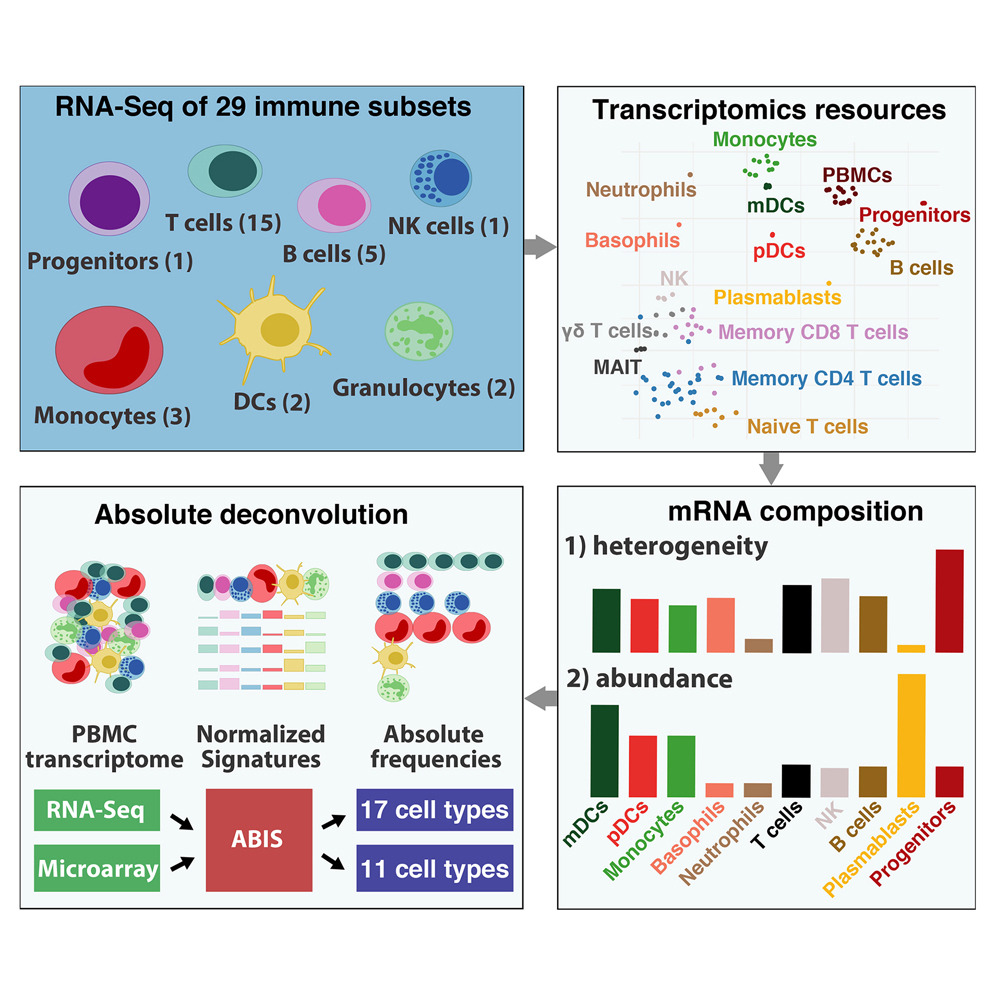

### Characterized 29 human PBMC cell types (long and short names).

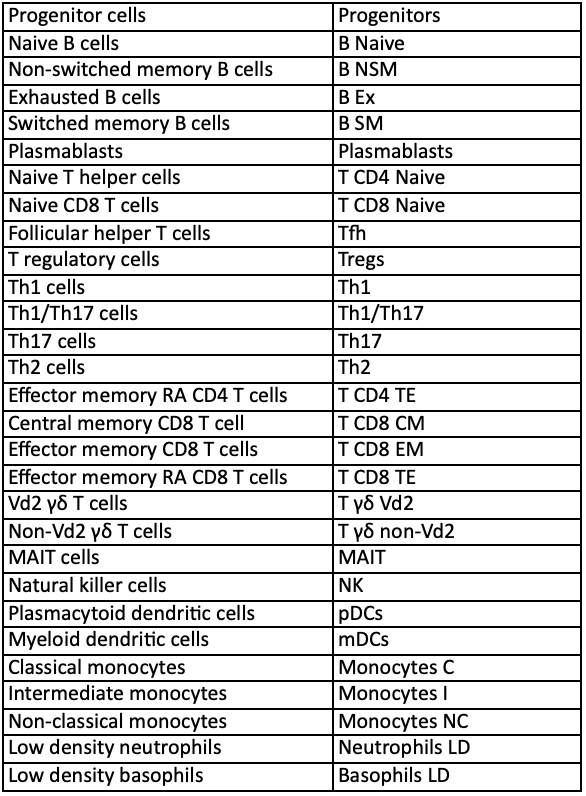

In [4]:
gene_set = read_data(
    "../../BloodBloodEverywhere.nb/input/RNA-Seq Signatures Normalized by mRNA Abundance Allow Absolute Deconvolution of Human Immune Cell Types/mmc4.xlsx";
    s = "DEG modules",
)[
    !,
    1:2,
]

,Gene name,Cell type
,Any,Any
1,AP001171.1,Progenitors
2,AC010745.4,Progenitors
3,CD34,Progenitors
4,HTR1F,Progenitors
5,MMP2,Progenitors
6,SCT,pDCs
7,IGLVI-70,B cells
8,LINC01478,pDCs
9,LINC02218,Neutrophils LD


In [5]:
for (gene, set) in eachrow(gene_set)

    if !(gene isa String)

        println("Problem: ", set, "    ", gene)

        continue

    end

    if haskey(set_to_gene_, set)

        push!(set_to_gene_[set], gene)

    else

        set_to_gene_[set] = [gene]

    end

end

set_to_gene_

Problem: Progenitors    2018-09-05
Problem: Neutrophils LD    2018-03-01
Problem: B Ex+SM    2018-03-02


Dict{String, Vector{String}} with 50 entries:
  "T Innate"        => ["LAG3"]
  "mDCs"            => ["CD207", "RP11-389C8.2", "CD1E", "CD1B", "ENHO", "ZNF36…
  "pDCs"            => ["SCT", "LINC01478", "RP11-73G16.2", "RP11-71G12.1", "KC…
  "Th2"             => ["RP11-428L9.2", "SEMA5A", "NEFL", "CDO1", "CCR8", "ZNF4…
  "T CD4"           => ["FBLN7", "CD40LG", "RP11-223C24.1", "TRAV8-4", "TRAV26-…
  "B Memory"        => ["RP11-444D3.1", "TNFRSF13B", "DOK7", "ZBTB32"]
  "T gd"            => ["AE000661.37"]
  "Monocytes NC"    => ["AC099552.2", "LYPD2", "AC104809.4", "RP11-221J22.2", "…
  "Monocytes"       => ["SLC24A4", "SLC37A2", "CD300E", "SLC9A7P1", "SLC7A7", "…
  "T CD4 Naive"     => ["CCR12P", "LEF1-AS1", "ADTRP", "EDAR", "ANKRD55", "KRT7…
  "T CD8 EM+TE"     => ["IFNG"]
  "T CD4 Memory"    => ["TNFRSF4", "LINC00892"]
  "NK"              => ["ZMAT4", "COL13A1", "LINGO2", "LGALS9B", "KIR2DP1", "KI…
  "T Naive"         => ["MMP28", "RP11-61O1.2", "TCEA3", "TRABD2A"]
  "B Naive"     

## De Novo Origin of Human Protein-Coding Genes

### Identified 60 human specific protein-coding genes of de novo origin, strictly

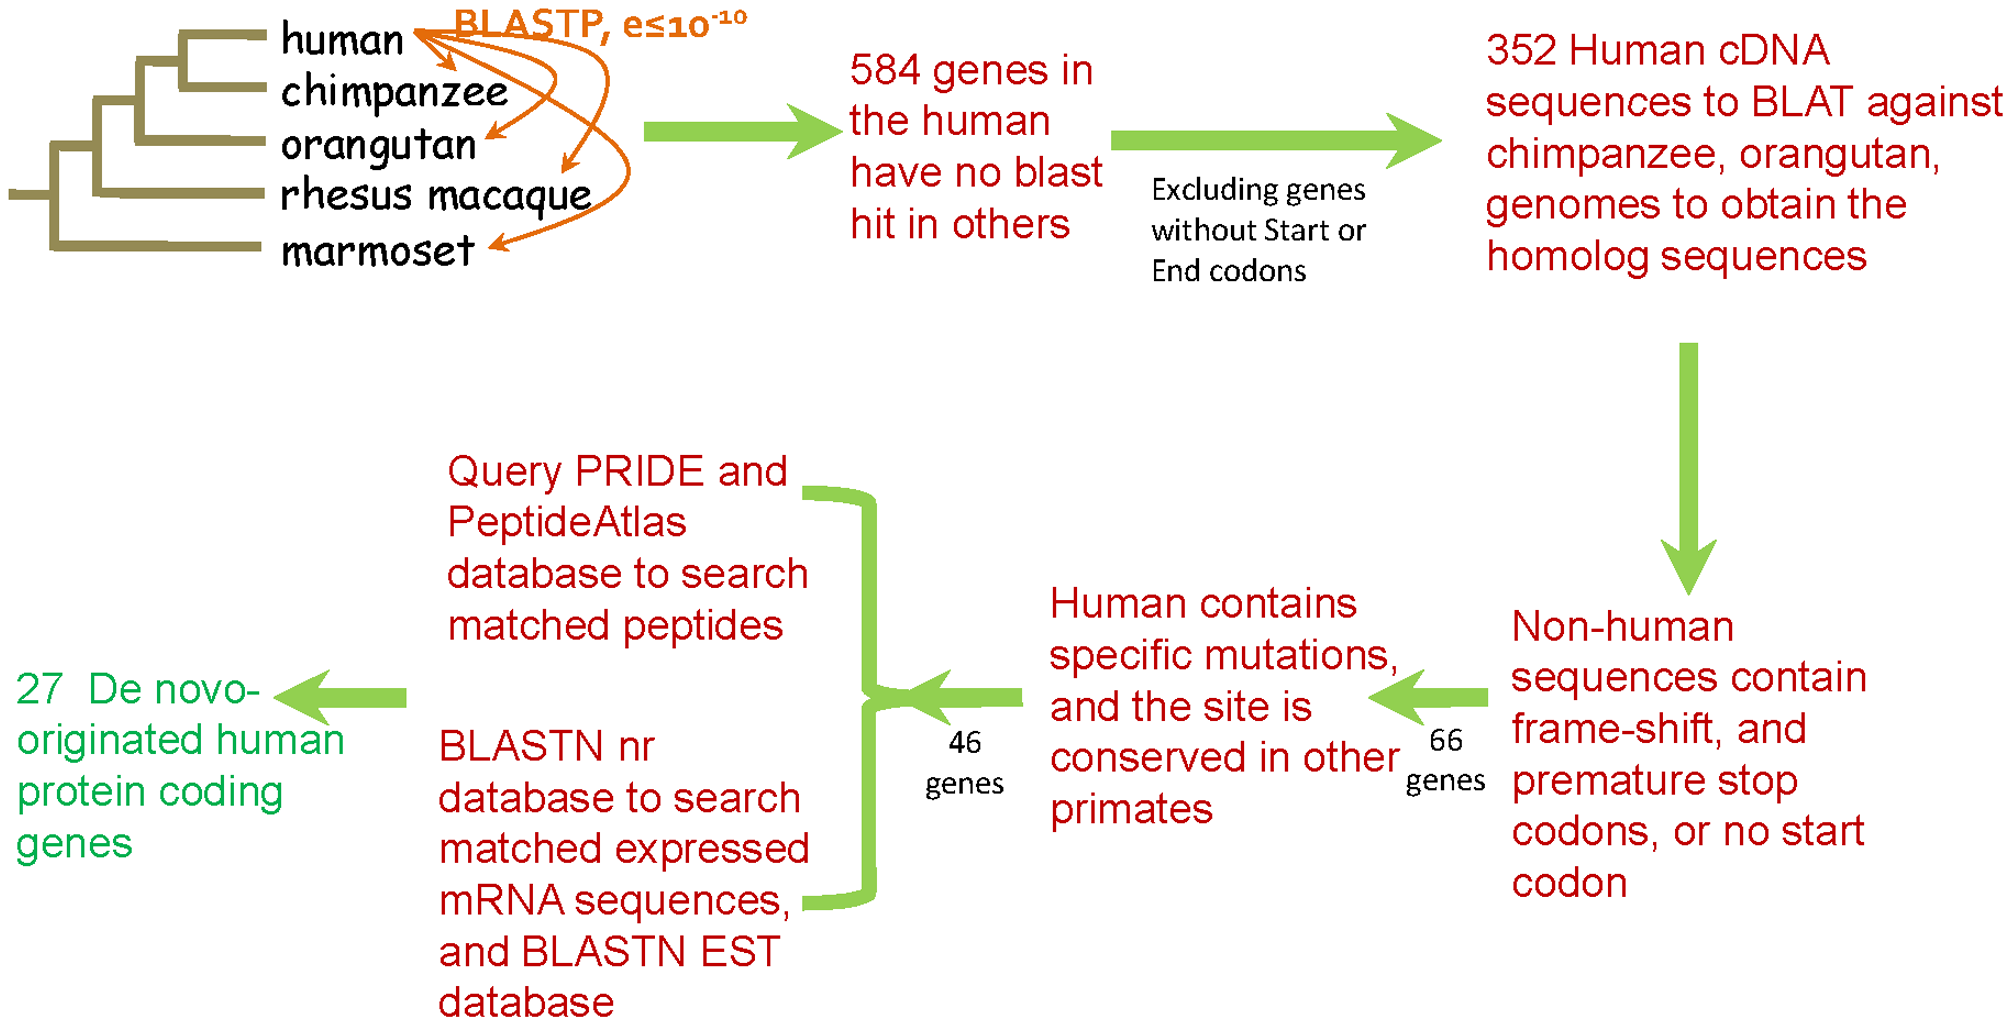

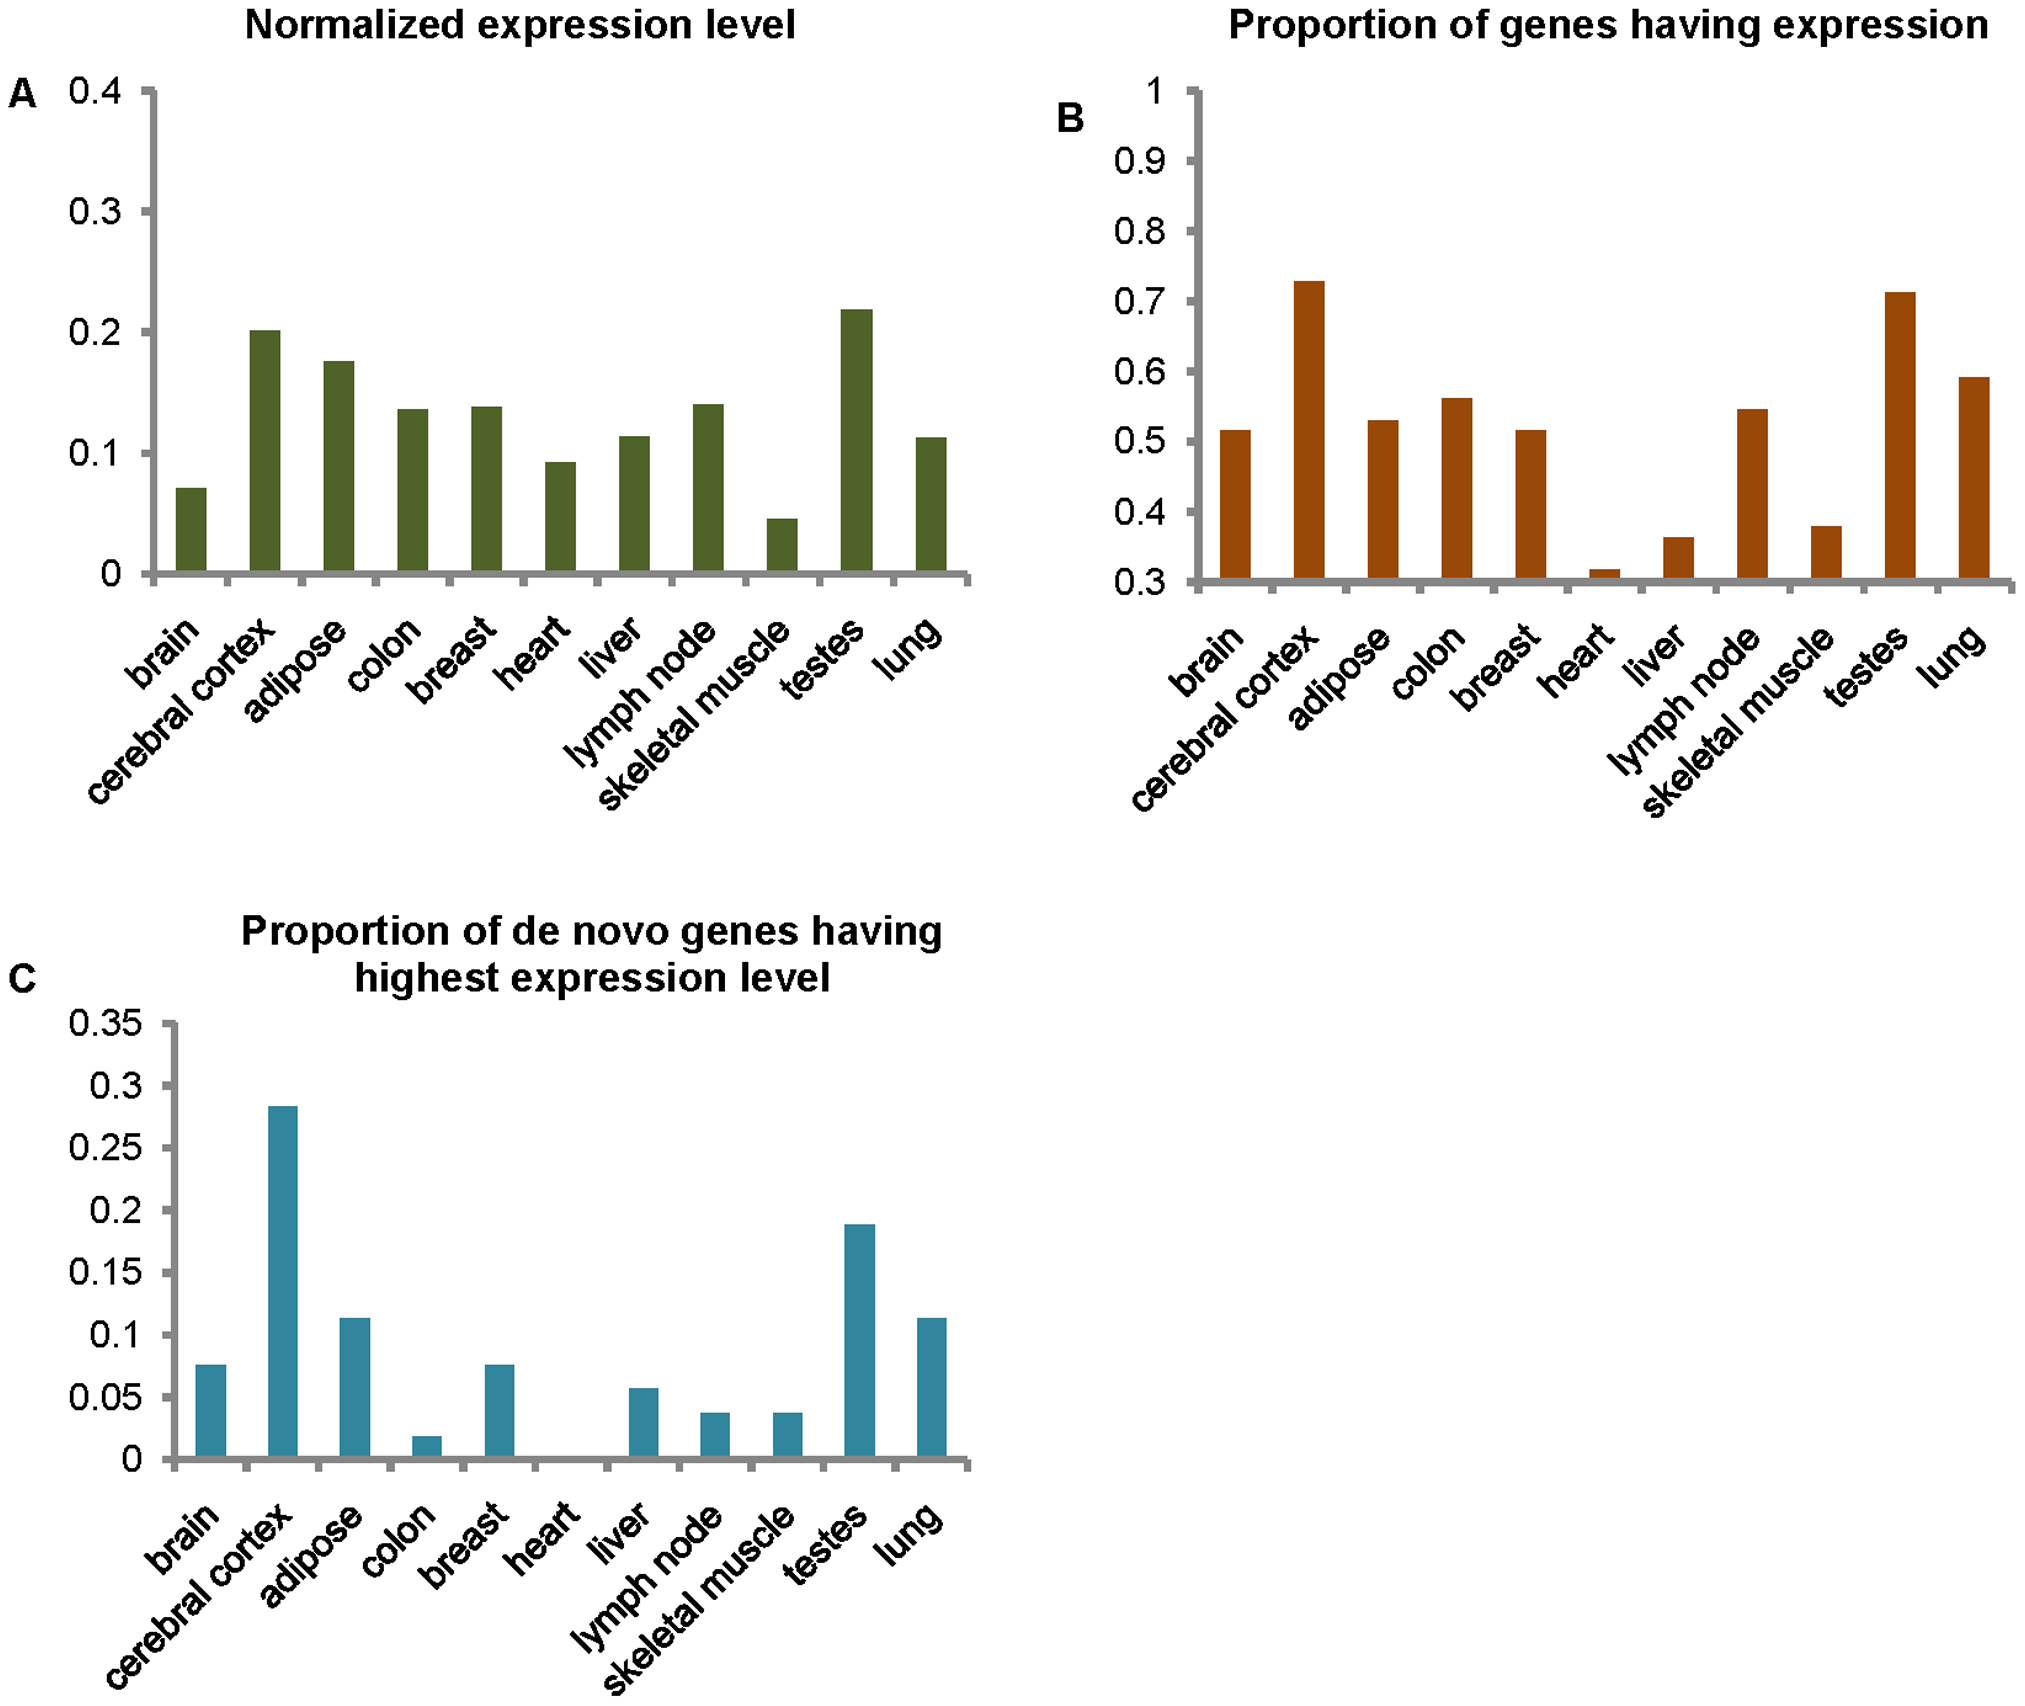

### Lesson
- De novo genes listed in the previous versions of various databases are removed.
- De novo genes are often single copy, single exon, and small.
- Humans split from chimpanzee 6 million years ago.
- De novo gene birth rate is 10 genes per million years.
- De novo genes' expressions are low.
- De novo genes have higher substitution rate than human genome; but the corresponding chimpanzee sequences have even higher rate.
- De novo genes may be made in testes, which is more demethylated and histone modified for more expression.

In [6]:
enst_ = """
ENST00000315678
ENST00000440429
ENST00000382849
ENST00000416759
ENST00000398976
ENST00000413098
ENST00000441895
ENST00000408895
ENST00000412222
ENST00000443383
ENST00000369474
ENST00000440128
ENST00000439540
ENST00000426719
ENST00000428272
ENST00000378936
ENST00000360899
ENST00000398830
ENST00000429826
ENST00000445321
ENST00000391613
ENST00000421885
ENST00000451773
ENST00000313693
ENST00000425314
ENST00000378537
ENST00000446051
ENST00000360706
ENST00000361187
ENST00000369468
ENST00000358421
ENST00000382514
ENST00000328030
ENST00000343077
ENST00000382641
ENST00000376812
ENST00000356354
ENST00000403504
ENST00000342892
ENST00000300458
ENST00000295075
ENST00000375012
ENST00000380709
ENST00000376181
ENST00000372896
ENST00000379167
ENST00000375768
ENST00000318084
ENST00000326801
ENST00000382842
ENST00000398378
ENST00000258741
ENST00000382805
ENST00000376593
ENST00000380008
ENST00000315897
ENST00000377180
ENST00000391387
ENST00000360340
ENST00000379854
"""

;

In [7]:
enst_gene = read_data("../input/enst_gene.tsv.gz")

enst_to_gene = Dict(zip(enst_gene[:, 1], enst_gene[:, 2]))

;

In [8]:
set_to_gene_["Human Genes 2011"] = ["CLLU1", "c22orf45", "DNAH10OS"]

for enst in split(enst_, '\n')

    push!(set_to_gene_["Human Genes 2011"], get(enst_to_gene, enst, enst))

end

set_to_gene_["Human Genes 2011"]

64-element Vector{String}:
 "CLLU1"
 "c22orf45"
 "DNAH10OS"
 "ZNF843"
 "ENST00000440429"
 "CFAP99"
 "ENST00000416759"
 "ENST00000398976"
 "ENST00000413098"
 "LINC02073"
 "ENST00000408895"
 "ENST00000412222"
 "ENST00000443383"
 ⋮
 "ENST00000382842"
 "ENST00000398378"
 "ENST00000258741"
 "ENST00000382805"
 "ACOXL-AS1"
 "PCBP3-AS1"
 "ENST00000315897"
 "ENST00000377180"
 "ENST00000391387"
 "ENST00000360340"
 "ENST00000379854"
 ""

## Genes with human-specific features are primarily involved with brain, immune and metabolic evolution

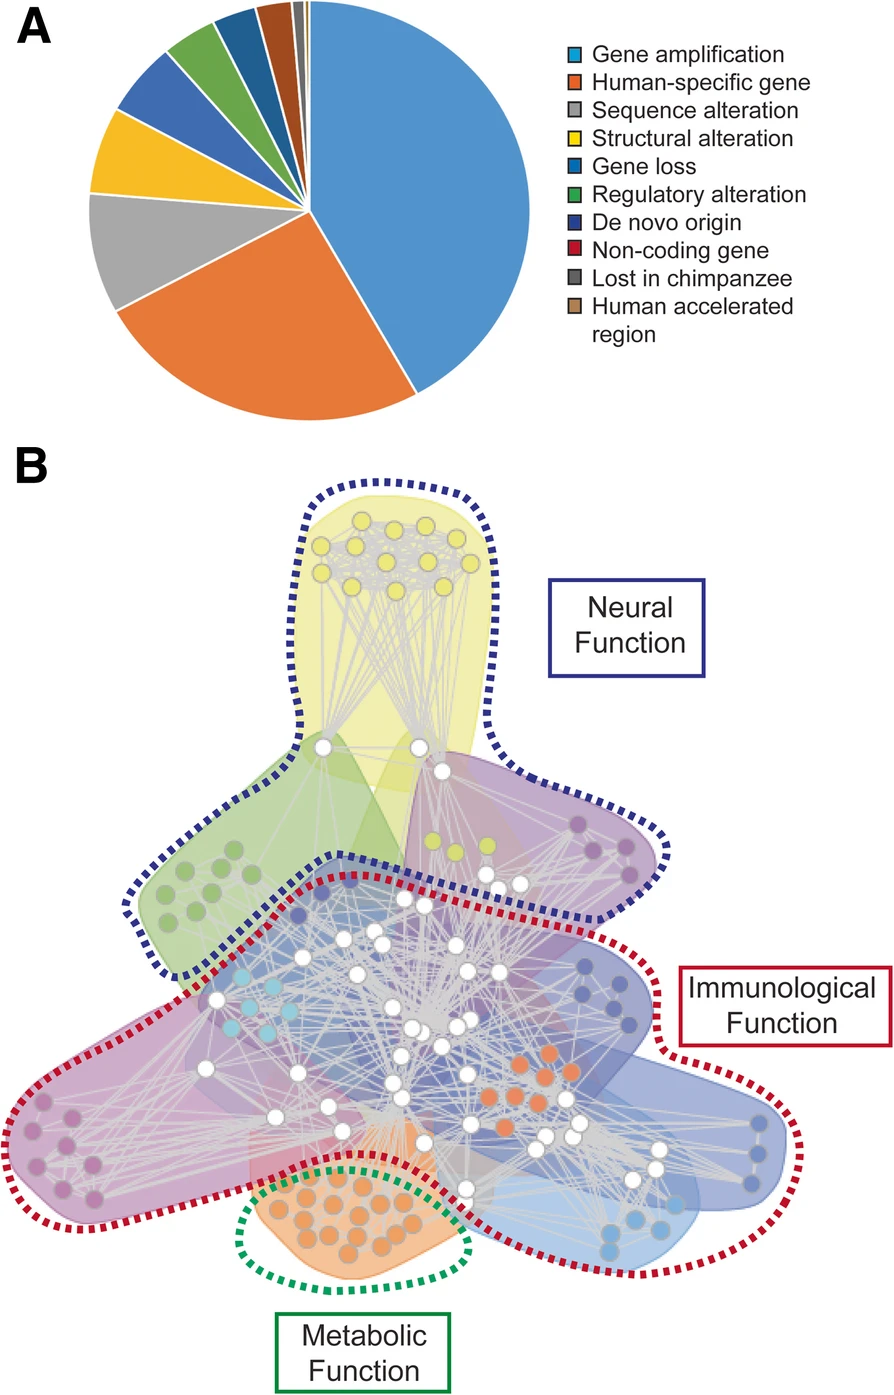

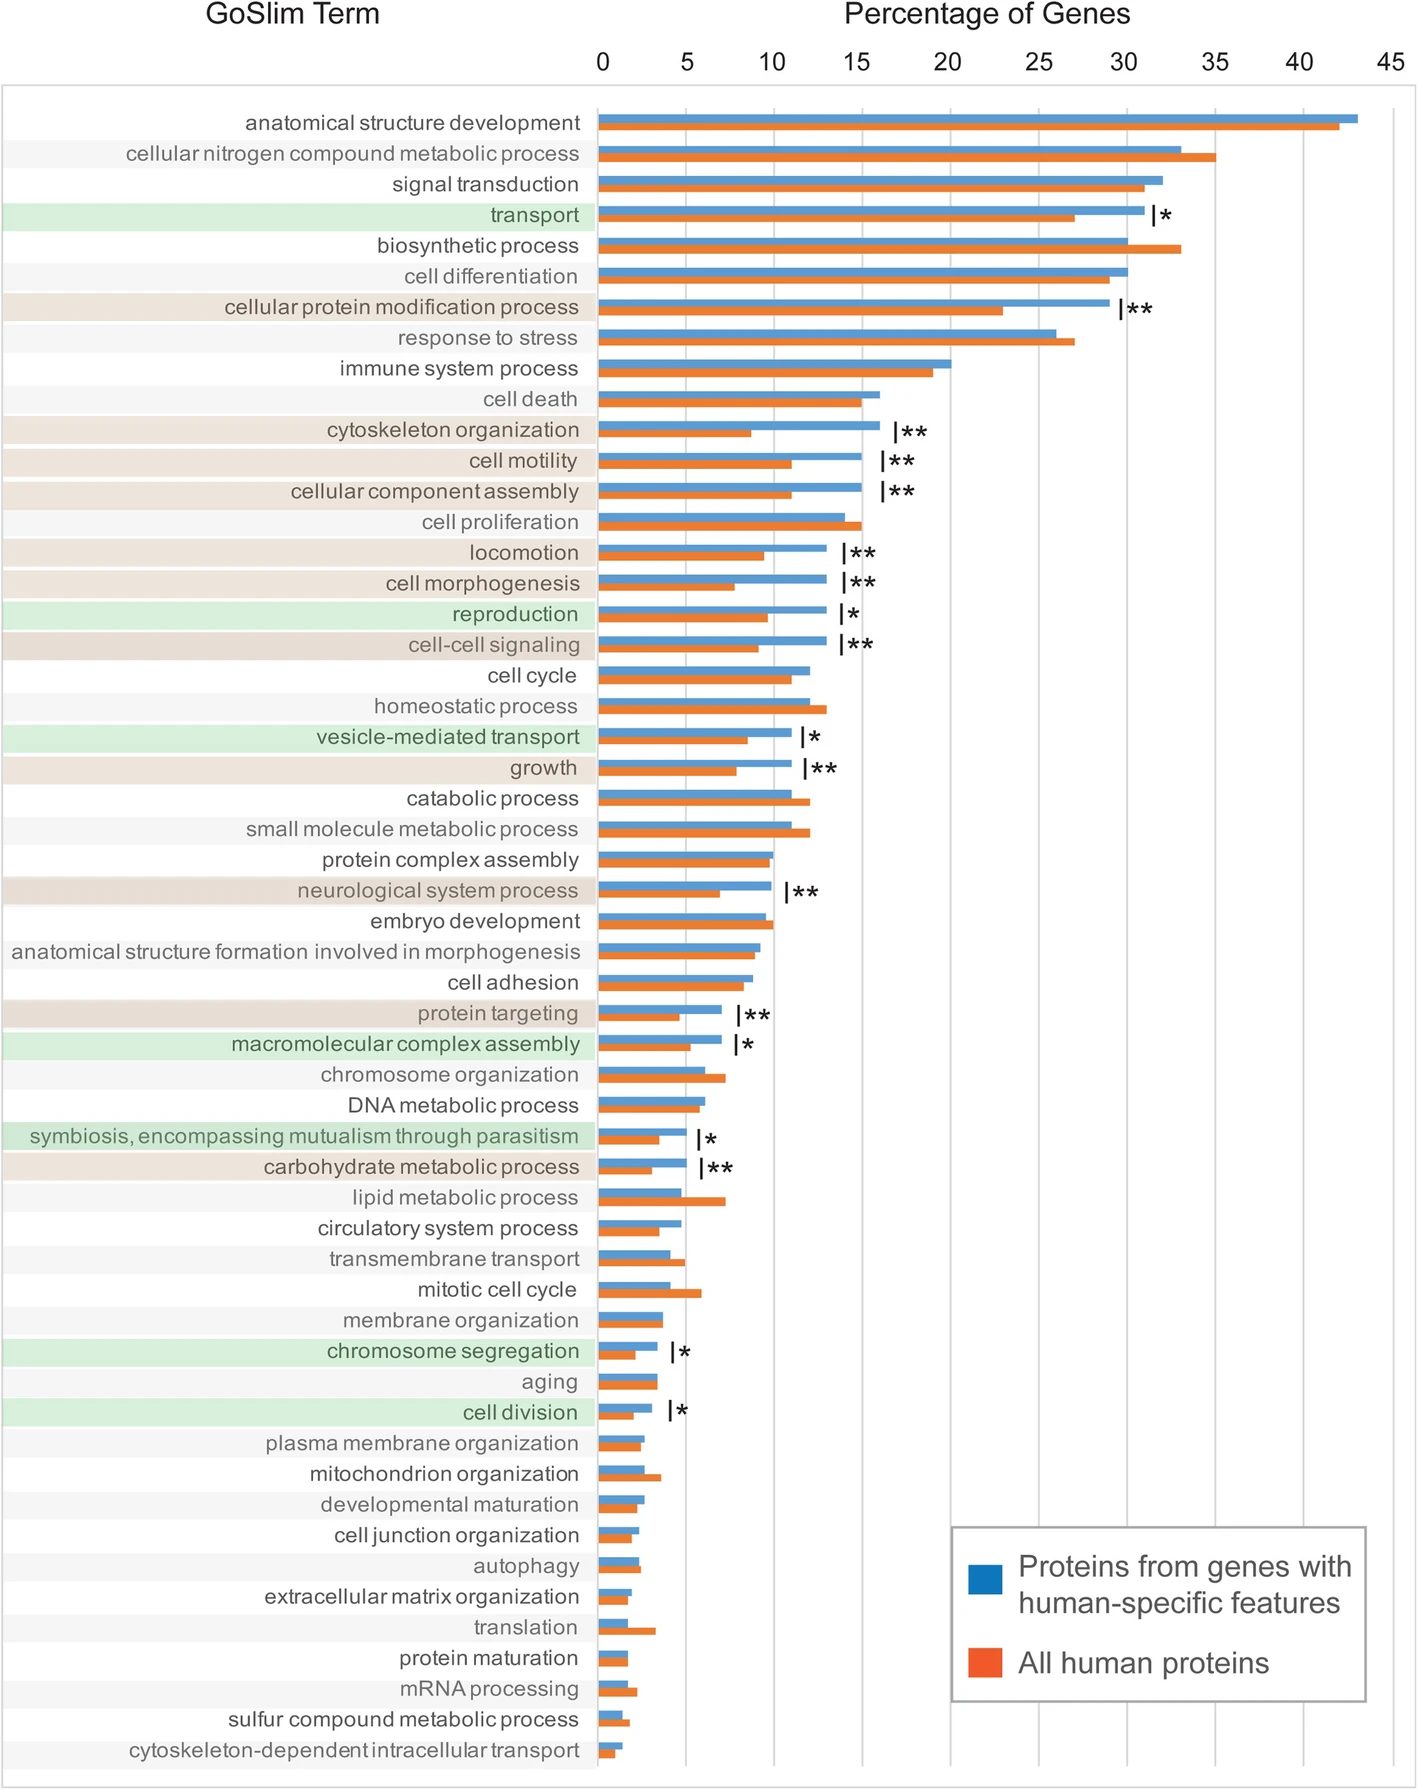

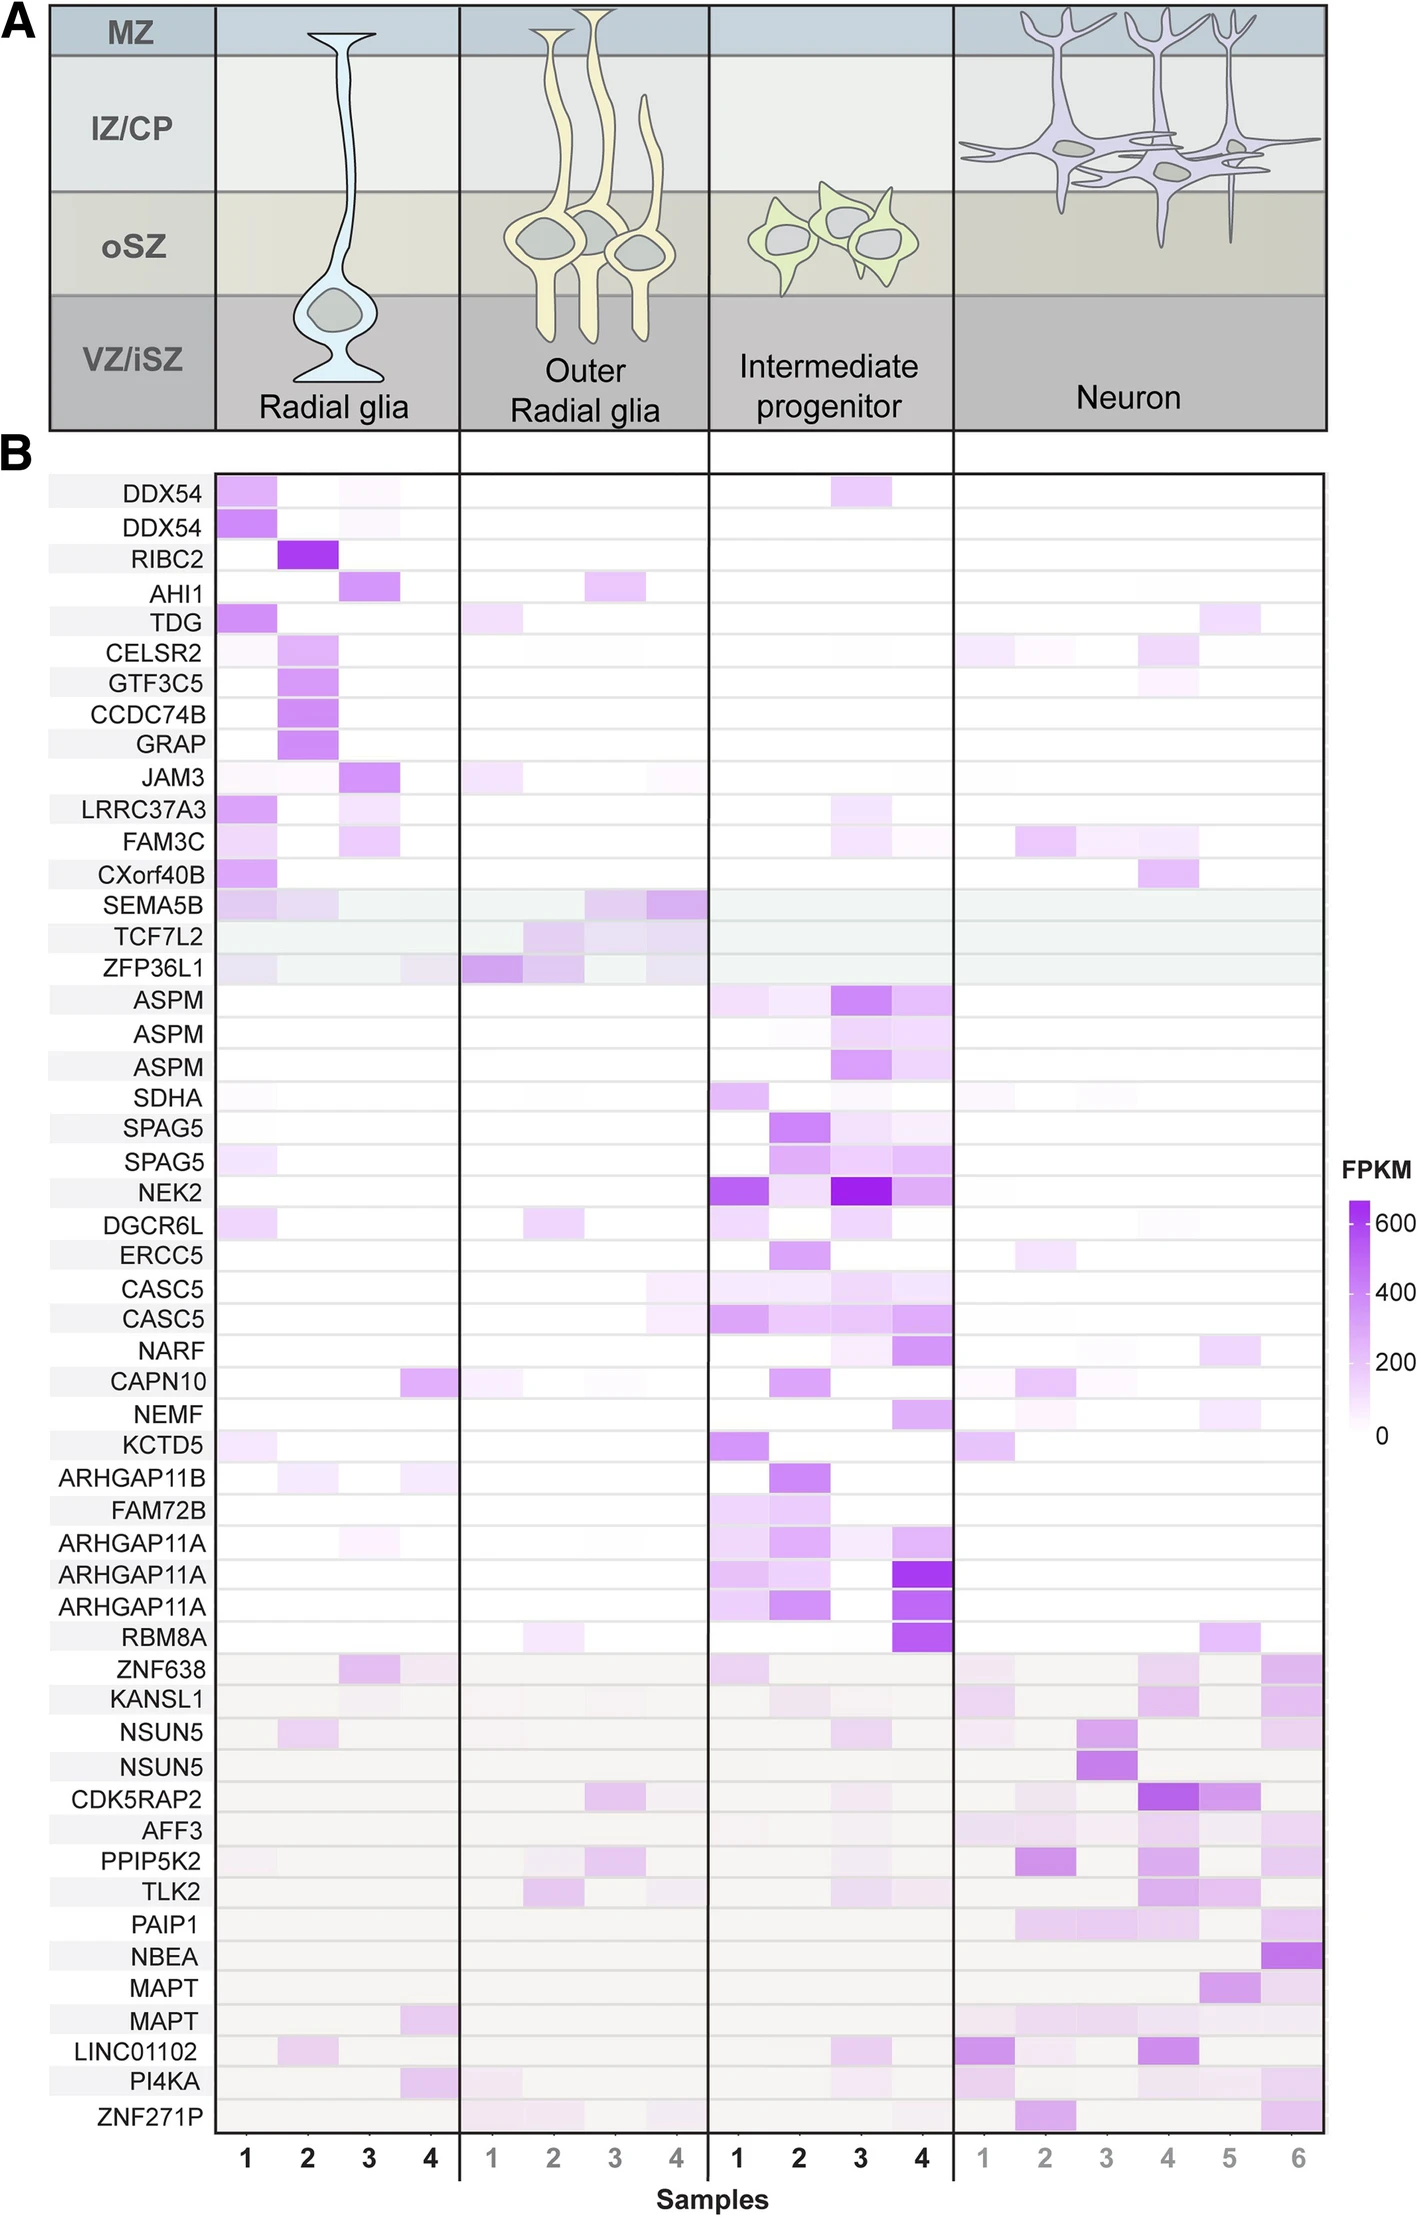

### Lesson
- Human and chimpanzee genomes differ in 30 million substitutions, which is 1.2% of the human genome.
- The human brain size 3Xed in 2 million years.
- Subventricular zone produces neuronal cells.
- Chromosome X and 7 have more human-specific genes.
- The human specific genes influence infection, diet, and brain expansion.

In [9]:
gene_x_information = read_data(
    "../input/Genes with human-specific features are primarily involved with brain, immune and metabolic evolution/12859_2019_2886_MOESM2_ESM.xlsx",
    s = "HumanSpecific Genes",
)

gene_ = gene_x_information[:, 1]

gene_[1] = string(gene_[1])

set_to_gene_["Human Gene 2019"] = gene_

873-element Vector{Any}:
 "39326"
 "AATBC"
 "ABCB10"
 "ABCC12"
 "ABCC6"
 "ABCD1P2"
 "ABCD1P5"
 "ABCD4"
 "ABHD17A"
 "ABHD17AP1"
 "AC005042.4"
 "AC005488.11"
 "AC008132.13"
 ⋮
 "ZNF355P"
 "ZNF492"
 "ZNF519"
 "ZNF595"
 "ZNF638"
 "ZNF705B"
 "ZNF705G"
 "ZNF790"
 "ZNF843"
 "ZNF85"
 "ZNF850"
 "ZNF962P"

## Intersect

In [14]:
set_to_gene_ = sort(set_to_gene_)

set_ = collect(keys(set_to_gene_))

n_set = length(set_)

set_x_set = Matrix{Int}(undef, n_set, n_set)

for set1 in set_

    println()

    println("## ", set1)

    set_1_gene_ = set_to_gene_[set1]

    for set2 in set_

        if set1 == set2

            continue

        end

        intersect_ = intersect(set_1_gene_, set_to_gene_[set2])

        n_intersect = length(intersect_)

        if 0 < n_intersect

            println()

            println("### ", set2, " (", n_intersect, ")")

            for gene in intersect_
                
                row = gene_x_information[findfirst(gene_ .== gene), :]
                
                println("- ", gene, " @ chr", row["Chromosome"], " | ", join([titlecase(replace(information, "_" => " ")) for information in row[["Gene Type", "Mechanism of Origin"]]], " | "))
                
            end

        end

    end

end


## APC

## B Ex

## B Ex+SM

## B Memory

## B NSM

## B Naive

### Human Gene 2019 (1)
- MYO7B @ chr2 | Protein Coding | Modern Human-Specific Coding Change

## B Naive+Memory

### Human Gene 2019 (2)
- CD24 @ chr6 | Protein Coding | Lost In Chimpanzee
- EBF1 @ chr5 | Protein Coding | Human-Specific Derived Allele

## B Naive+NSM

## B SM

## B cells

## Basophils LD

### Human Gene 2019 (8)
- DSG3 @ chr18 | Protein Coding | Human-Specific Retrotransposon Insertion
- OR6K4P @ chr1 | Unprocessed Pseudogene | Human-Specific Gene Loss Or Pseudogene
- TRIM51 @ chr11 | Protein Coding | Human-Specific Gene Duplication
- TRIM64 @ chr11 | Protein Coding | Human-Specific Gene
- OR2A4 @ chr6 | Protein Coding | Human-Specific Gene
- RP11-466P24.6 @ chr5 | Antisense | Modern Human-Specific Substitution In Intronic Region
- OR2A7 @ chr7 | Protein Coding | Human-Specific Gene Duplication
- AREG @ chr4 | Protein Coding | Human-Specific Gene Duplication

## DCs

## Granulocytes LD

## Human Gene 201